In [1]:
# vview (c) 2015 Teruhisa Okada

% matplotlib inline

import netCDF4
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
import pandas as pd
from geopy.distance import vincenty


def vview(stafile, stations, vname, time, cff=1.0):
    stations = np.asarray(stations)
    
    nc = netCDF4.Dataset(stafile, 'r')
    if type(time) == int:
        t = time
        time = netCDF4.num2date(nc.variables['ocean_time'][t], romspy.JST)
    elif type(time) == datetime.datetime:
        time2 = netCDF4.date2num(time, romspy.JST)
        time3 = nc.variables['ocean_time'][:]
        t = np.where(time3==time2)[0][0]
    else:
        print 'ERROR: your time type =',type(time)
    print '\n',time, t
        
    cs_r = nc.variables['Cs_r'][:]
    h = nc.variables['h'][stations]
    zeta = nc.variables['zeta'][t,stations]
    lon = nc.variables['lon_rho'][stations]
    lat = nc.variables['lat_rho'][stations]
    var = nc.variables[vname][t,stations,:]
    
    depth = np.zeros([len(stations),len(cs_r)])
    dist = np.zeros([len(stations),len(cs_r)])
    for s in range(len(stations)):
        depth[s,:] = (h[s] + zeta[s]) * cs_r[:]
        if s == 0:
            dist[s,:] = 0
        else:
            back = [lon[s-1],lat[s-1]]
            fore = [lon[s],lat[s]]
            dist[s,:] = dist[s-1,:] + vincenty(back, fore).meters

    fig, ax = plt.subplots(figsize=[12,4])
    cflevels = romspy.vrange(vname, unit='g')
    clevels = cflevels
    if vname == 'temp': 
        cflevels=np.arange(7,30.1,1.0)
        clevels=cflevels
    if vname == 'salt': 
        cflevels=np.arange(23,32.2,0.2)
        clevels=np.arange(23,32.2,1.0)
    if vname == 'chlorophyll': 
        cflevels=np.arange(0,20.5,0.5)
        clevels=np.arange(0,21,1.0)
    origin = 'upper'
    #origin = 'lower'
    CF = plt.contourf(dist/1000, depth, var*cff, levels=cflevels, extend='both', origin=origin)
    C = plt.contour(dist/1000, depth, var*cff, colors='k', levels=clevels, origin=origin)
    plt.clabel(C, fmt = '%2.1f', colors = 'w')
    #plt.pcolor(dist, depth, var) 　　　　　　　　　　# グリッド状がいいなら
    CB = plt.colorbar(CF)
    CB.ax.set_ylabel(vname)
    
    #plt.xlim(0,20)
    #plt.ylim(-20,0)
    
    plt.xlabel('distance(km)')
    plt.ylabel('depth(m)')
    plt.title(datetime.datetime.strftime(time, '%Y-%m-%d %H:%M:%S'))
    

stafile = 'Z:/roms/Apps/OB500_fennelP/NL12/ob500_sta.nc'
stations = [13+i for i in range(20)] # 14 - 33

import romspy
#romspy.get_time(stafile)


2012-01-31 00:00:00 60


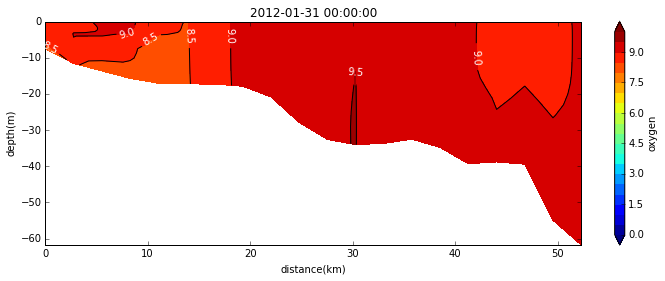

In [5]:
#time = datetime.datetime(2012, 6, 1, 12)
time = 60
vview(stafile, stations, 'oxygen', time, cff=romspy.mol2g_O2)


2012-01-31 00:00:00 60


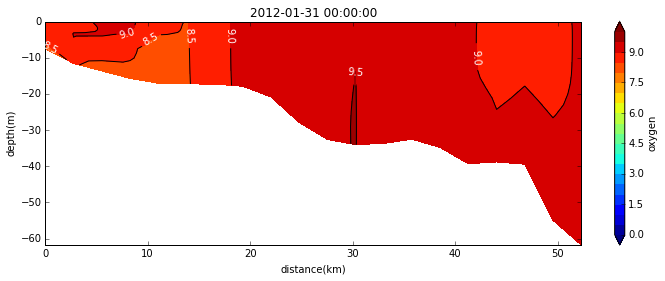

In [4]:
stafile = 'Z:/roms/Apps/OB500_fennelP/case13/ob500_sta.nc'

time = 60
vview(stafile, stations, 'oxygen', time, cff=romspy.mol2g_O2)


2012-06-01 12:00:00 305


f:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
f:\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


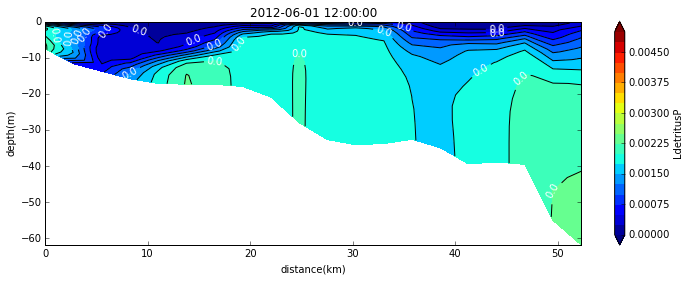

In [3]:
time = 305
vview(stafile, stations, 'LdetritusP', time, cff=romspy.mol2g_P)


2012-06-01 12:00:00 305


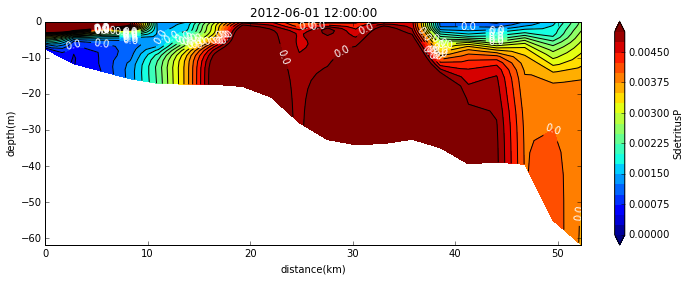

In [4]:
time = 305
vview(stafile, stations, 'SdetritusP', time, cff=romspy.mol2g_P)


2012-06-01 12:00:00 305


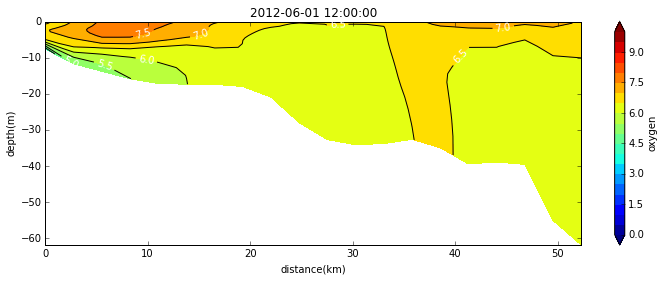

In [3]:
#time = datetime.datetime(2012, 6, 1, 12)
time = 305
vview(stafile, stations, 'oxygen', time, cff=romspy.mol2g_O2)